<a href="https://colab.research.google.com/github/lail-lei/AML/blob/main/project5/lailei_project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Pandas and Create DataFrames**

In [1]:
# Pandas is mainly used for data analysis. Pandas allows importing data from various file formats 
# such as comma-separated values, JSON, SQL, Microsoft Excel. 
# Pandas allows various data manipulation operations such as merging, reshaping, selecting, 
# as well as data cleaning, and data wrangling features.
import pandas as pd

# NumPy has support for large, multi-dimensional arrays and matrices, along with 
# a large collection of high-level mathematical functions to operate on these arrays.
import numpy as np

# Import matplotlib 
import matplotlib.pyplot as plt 
# Import seaborn for graphing 
import seaborn as sbn

# Read raw file from github into dataframes 
df = pd.read_csv('https://raw.githubusercontent.com/bforoura/AML/master/letters.csv')


# **Data Preparation**

In [2]:
# there are 17 columns and 20,000 rows
df.shape

(20000, 17)

In [3]:
# let's describe the data set to see what it looks like and if any values are missing
df.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [4]:
# all x-values appear to present (nothing missing/to impute) and numeric
# will need to encode the target class (26 targets)

y = pd.DataFrame(df['class'])

# import encoder
from sklearn.preprocessing import OrdinalEncoder

# encoded y
enc = OrdinalEncoder()
enc.fit(y)
y = pd.DataFrame(enc.transform(y))

y = y[0]
y.shape

(20000,)

In [5]:
# all x-values appear to present (nothing missing/to impute) and numeric
# will need to encode the target class (26 targets)
X = df.copy(deep=True)
X.drop(['class'], axis=1, inplace=True)

# print x
X.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,2,4,4,3,2,7,8,2,9,11,7,7,1,8,5,6
1,4,7,5,5,5,5,9,6,4,8,7,9,2,9,7,10
2,7,10,8,7,4,8,8,5,10,11,2,8,2,5,5,10
3,4,9,5,7,4,7,7,13,1,7,6,8,3,8,0,8
4,6,7,8,5,4,7,6,3,7,10,7,9,3,8,3,7


# **Plot Label Frequencies**

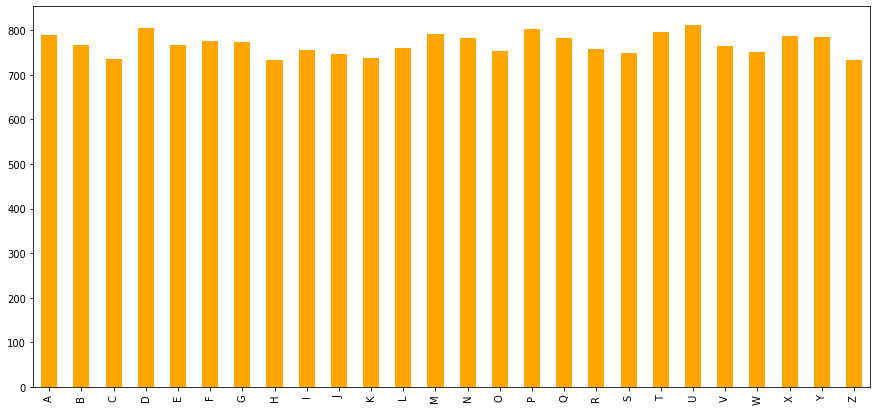

In [6]:
# get frequency per target class
label_frequencies = df['class'].value_counts().sort_index(ascending=True)

label_frequencies.plot(figsize=(15,7), kind ='bar', color="orange")


In [7]:
print("Label frequencies range from %d to %d times per letter." % (min(label_frequencies), max(label_frequencies)) )
print("Average frequency: %d" % (label_frequencies.mean()))
print("Discrete uniform distribution of letters : %d" % (20000/26))

Label frequencies range from 734 to 813 times per letter.
Average frequency: 769
Discrete uniform distribution of letters : 769


I would say each letter is well represented. A discrete uniform distribution of letters is 769 instances of each letter. In actuality, each letter appears somewhere between 734 and 813 times. The average frequency of a letter is exactly 769. 



# **Create and Train Classifiers**

In [8]:
# the method used to train and cross validate

# import k fold, cross_val_score
from sklearn.model_selection import KFold, cross_val_score

def cross_validate_model (classifier_model, X, y):
  kfold = KFold(n_splits=3, shuffle=True, random_state=10)

  # perform model cross validation on the shuffled folds
  results = cross_val_score(classifier_model, X, y, cv=kfold)

  # return the mean score for all folds
  return results.mean()

## **Create and train single model classifiers**

In [9]:
# Create a variety of classification models such as decision tree, random forest, extra trees, SVM, SGD, etc.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# create 2 decision trees 
entropy_dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
gini_dt = DecisionTreeClassifier(criterion='gini', random_state=42)

# random forest, extra trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)
extra = ExtraTreesClassifier(random_state=42)

# svc linear, poly, rbf
linear_svc = SVC(kernel='linear', random_state=42, probability=True)
poly_svc = SVC(kernel='poly', random_state=42, probability=True)
rbf_svc = SVC(kernel='rbf', random_state=42, probability=True)

#sgd
sgd = SGDClassifier(loss = 'log', random_state=42)

In [10]:
# cross validate the entropy decision tree model
entropy_dt_score = cross_validate_model(entropy_dt, X, y)
print("Decision Tree Entropy Score:", entropy_dt_score)

Decision Tree Entropy Score: 0.8712997743452161


In [11]:
# cross validate the gini decision tree model
gini_dt_score = cross_validate_model(gini_dt, X, y)
print("Decision Tree Gini Score:", gini_dt_score)

Decision Tree Gini Score: 0.8656999193244658


In [12]:
# cross validate the random forest tree model
rf_score = cross_validate_model(rf, X, y)
print("Random Forest Score:", rf_score)

Random Forest Score: 0.9585999547907393


In [13]:
# cross validate the extra tree model
extra_score = cross_validate_model(extra, X, y)
print("Extra Tree Score:", extra_score)

Extra Tree Score: 0.9681999623391168


In [14]:
# cross validate the linear kernel svc model
linear_svc_score = cross_validate_model(linear_svc, X, y)
print("Linear SVC Score:", linear_svc_score)

Linear SVC Score: 0.8503998367438363


In [15]:
# cross validate the polynomial kernel svc model
poly_svc_score = cross_validate_model(poly_svc, X, y)
print("Polynomial SVC Score:", poly_svc_score)

Polynomial SVC Score: 0.9425498647059847


In [16]:
# cross validate the rbf kernel svc model
rbf_svc_score = cross_validate_model(rbf_svc, X, y)
print("RBF SVC Score:", rbf_svc_score)

RBF SVC Score: 0.9194501046024807


In [17]:
# cross validate the sgd (logistic) model
sgd_score = cross_validate_model(sgd, X, y)
print("SGD Score:", sgd_score)

SGD Score: 0.5542023678894062


## **Create and Train Voting Classifier**

In [18]:
from sklearn.ensemble import VotingClassifier

# hard voting classifier
hard_voting_clf = VotingClassifier(
    estimators=[('entropy', entropy_dt), ('gini', gini_dt), ('rf', rf), ('extra', extra), 
                ('lin_svc', linear_svc), ('poly_svc', poly_svc), ('rbf_svc', rbf_svc), ('sgd', sgd)],
    voting='hard')

In [19]:
# cross validate the hard voting model
hard_voting_score = cross_validate_model(hard_voting_clf, X, y)
print("Voting Score:", hard_voting_score)

Voting Score: 0.9567499122793635


# **Plot Model Accuracy Scores**

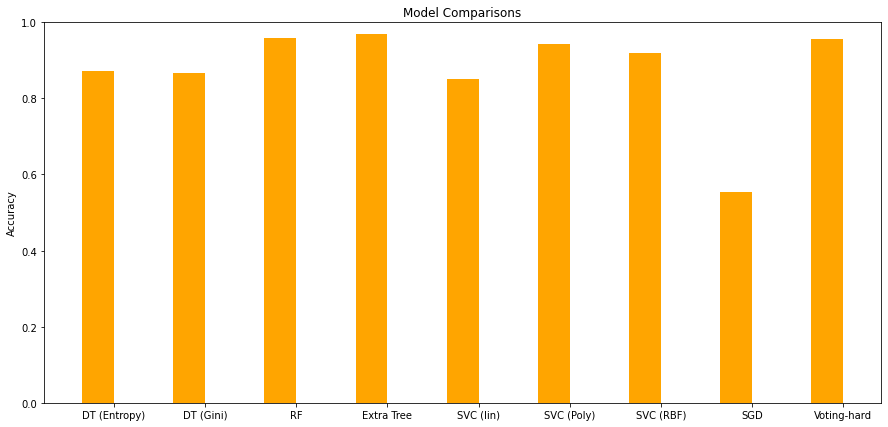

In [21]:
# Summarize the findings for all models

labels = ['DT (Entropy)', 'DT (Gini)', 'RF', 'Extra Tree', 'SVC (lin)', 'SVC (Poly)', 'SVC (RBF)', 'SGD', 'Voting-hard']
training_scores = [entropy_dt_score, gini_dt_score, rf_score, extra_score, linear_svc_score, poly_svc_score, rbf_svc_score, sgd_score, hard_voting_score]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width/2, training_scores, width, color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)


plt.title('Model Comparisons')
plt.show()

The voting classifier outperformed all but the highest performing classifiers. 

The hard voting classifier had an accuracy rate of ~ 95.7%. The highest performing classifiers were the random forest classifier (~ 95.9%) and the extra tree classifier (~ 96.8%).

The highest performing classifiers may have outperformed the voting classifier because of possible overfitting. The majority of classifier did not perform as highly as these classifiers. So while the extra trees or random forest classifiers could correctly identify an "edge case" letter, the other classifiers did not. Since the majority misclassified that letter, the hard voting classifier would select the misclassified label for that letter. These instances would result in a lower overall accuracy score for the voting classifier.

That said, if the random forest or extra tree classifiers are overfitted, they are likely only slightly overfitted. The difference between the voting classifier's accuracy rate and the random forest model's accuracy rate is ~ 0.2%. The extra tree classifier performs higher than random forest, but the difference between it and voting is still only ~ 1.1% percent. **The most likely explaination for this difference is that random forest and extra tree classifiers work very well for this dataset, and combining them with lower-performing classifiers doesn't provide benefits for this particular dataset.**


# **Plot Feature Importances**

In [22]:
import matplotlib.pyplot as pyplot
# get feature importances from the random forest model
rf.fit(X, y);
importance = rf.feature_importances_

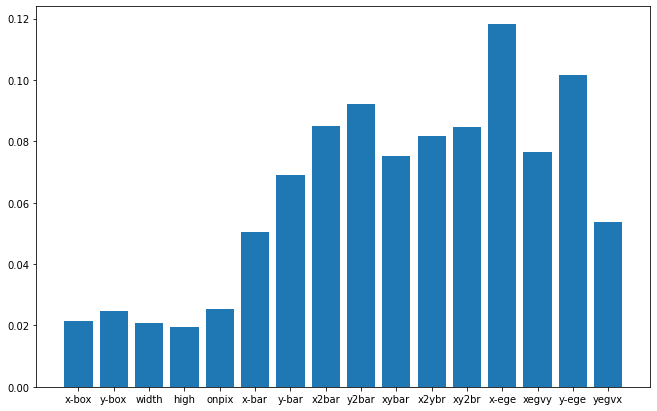

In [23]:

pyplot.figure(figsize=[11, 7])
# plot feature importances
pyplot.bar(X.columns, importance)

pyplot.show()

**Random Forest Significant Features**

The features random forest found most significant are x-ege, y-ege, y2bar, and x2bar. This means that these features were the most useful (or made the most difference) in classifying each image as a particular target class (letter). 

X-ege is the mean number of edges (the number of times an "off" pixel is followed by an "on" pixel, or the image boundary is hit) as the image is scanned from left to right, along the whole vertical length of the image.

Y-ege is the mean number of edges as the image is scanned from top to bottom, along the whole horizontal length of the image.

Y2bar is the mean squared vertical position of all of the "on" pixels in the image.

X2bar is the mean squared horizontal position of all of the "on" pixels in the image.

This means when a random forest classifier is chosing a target class for an image, the horizontal and vertical edges of that image, and the the mean squared vertical and horizontal position of the "on" pixels in that image are the most significant distinguishing features between target classes. (They contribute the most as to whether a 't' is classified as a 't' or an 'o' for example.)


To find out whether other tree models agree with these feature importances, I plotted them below:

In [24]:
# get feature importances from the extra tree model
extra.fit(X, y);
extra_importance = extra.feature_importances_

In [25]:
# get feature importances from the dt (entropy) model
entropy_dt.fit(X, y);
edt_importance = entropy_dt.feature_importances_

In [26]:
# get feature importances from the dt (gini) model
gini_dt.fit(X, y);
gini_importance = gini_dt.feature_importances_

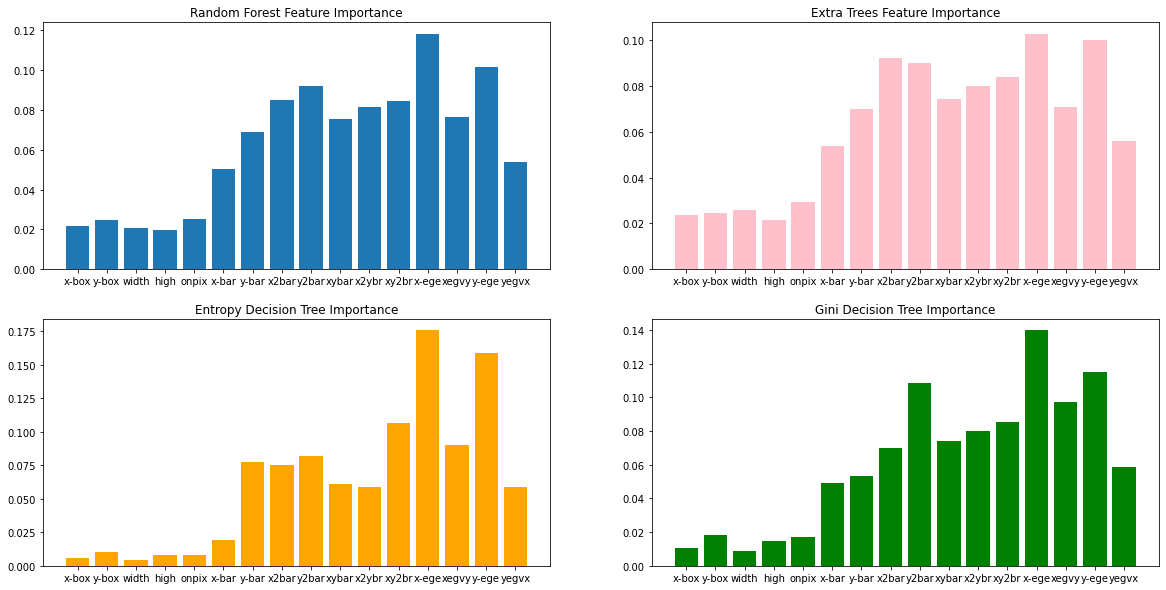

In [27]:

pyplot.figure(figsize=[20, 10])

# sp1
pyplot.subplot(221).set_title("Random Forest Feature Importance")
pyplot.bar(X.columns, importance)

# sp2
pyplot.subplot(222).set_title("Extra Trees Feature Importance")
pyplot.bar(X.columns, extra_importance, color="pink")

# sp3
pyplot.subplot(223).set_title("Entropy Decision Tree Importance")
pyplot.bar(X.columns, edt_importance, color="orange")

# # sp4
pyplot.subplot(224).set_title("Gini Decision Tree Importance")
pyplot.bar(X.columns, gini_importance, color="green")


pyplot.show()



Clearly, different tree models have different weights for each feature. But all tree classifier's feature importance plots have a similiar shape. In general, all tree models for this dataset agree on the importance of x-ege and y-ege as most significant features. They agree that x-box, y-box, width and high are less significant features.

In general, the simple descion trees had a few very significant features and many less significant features. Random forest and extra tree (especially) seemed to get more value from all features (the lowest significance is not as low as the lowest in the simple decision trees).

Some disagreement between the importance of certain features makes sense. When a decision tree ranks a feature in a dataset, it arrives at that rank by calculating the decrease in node impurity by the probability of reaching that node. Feature rank therefore depends on a number of factors, like the impurity criterion (Gini/Entropy) used and the individual members of the dataset the tree is being constructed from. 

# **3D Plot of Target Values**

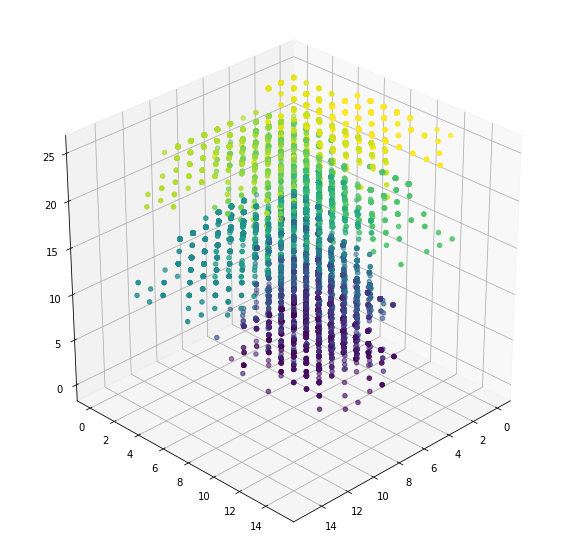

In [28]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Set up data for three-dimensional scattered points; use the 26 labels for color map
ax.scatter3D(xs=X["x-ege"], ys=X["y-ege"], zs=y, c=y)

# rotate the axes and update the view
ax.view_init(30, 45)
plt.draw()

When the two most significant features x-ege and y-ege and the target class are visualized on a 3D plot, the data falls into distinct columns and separate (color) clusters. Just by considering the features x-ege and y-ege alone, the data can grouped into distinct target classes, which supports the importance of both features (as found by all tree models). 

# **K-Means**

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
processedX =  pd.DataFrame(scaler.transform(X), columns=X.columns);

In [30]:
from sklearn.cluster import KMeans

# 26 clusters (1 per letter)
k = 26
kmeans = KMeans(n_clusters=k, random_state=42)
# train the model
y_pred = kmeans.fit_predict(processedX)

In [31]:
# print the results
print(y_pred)

# 20,000 items have been classified
y_pred.shape

[10 19  7 ... 18 16 23]


(20000,)

In [32]:
# print the inertia
kmeans.inertia_

121123.58887546687

This inertia value is huge!

In [49]:
# let's create inertias as a function of k
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(processedX)
                for k in range(1, 27)] #consider all k sizes from 1 to 26 
# hold in an array
inertias = [model.inertia_ for model in kmeans_per_k]

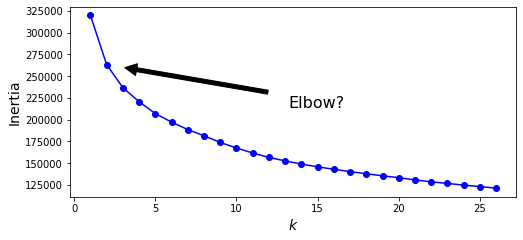

In [62]:
# let's plot our inertias per k value
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 27), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
# annotation to point out elbow 
plt.annotate('Elbow?',
              xy=(2, inertias[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

The greatest decline in intra-cluster variance (inertia) occurs between k = 1 and k = 2, however, the curve of the elbow plot is very soft. A k value of 2 or 3 might be good choices.

In [72]:
# let's create the silhouette inertia values
from sklearn.metrics import silhouette_score

silhouette_score(processedX, kmeans.labels_)
# hold in an array
silhouette_scores = [silhouette_score(processedX, model.labels_)
                     for model in kmeans_per_k[1:]]

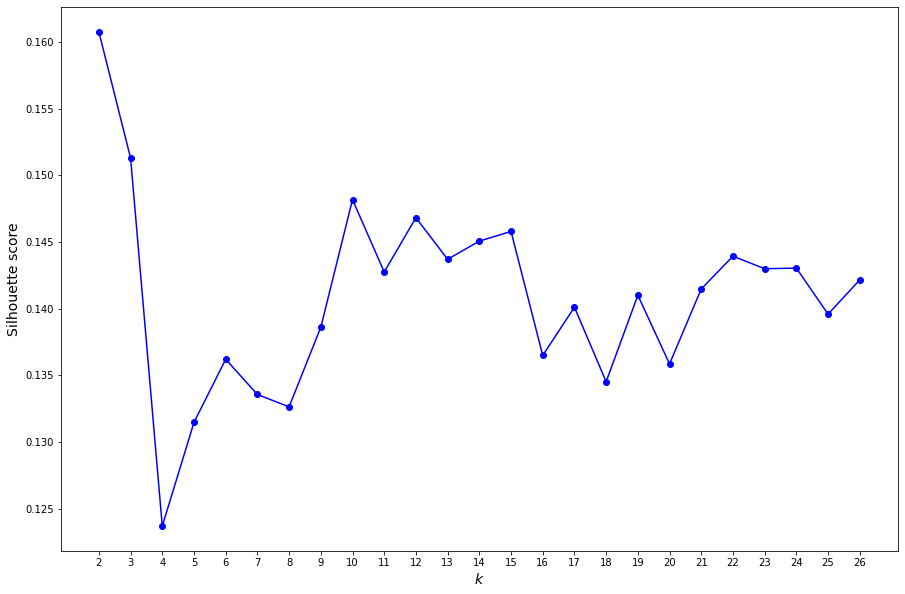

In [74]:
# plot the sillhoute inertias 
plt.figure(figsize=(15, 10))
plt.plot(range(2, 27), silhouette_scores, "bo-") # cluster size k = 1 is cut so start at 2
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.gca().set_xticks(range(2, 27))
plt.show()

Cluster sizes of 2 and 3 have the highest (best) silhoutte scores. This means that the silhoutte coefficient across all instances with cluster sizes 2 and 3 are closest to 1. 

Interestingly, when cluster size is increased to 4, the silhoutte score drops to it's lowest value. This suggests that at a cluster size of 4, the mean intracluster distance across all instances is much less than the mean nearest-cluster distance across all instances. Therefore, when cluster size is 4, many instances may either be assigned to the wrong cluster or may be very close to a cluster boundary. 

The silhoutte score increases to a (lesser) second peak at a cluster size of 10. My intuition for this behavior is that the "distinguishing" features between cluster 4 and another cluster are not very useful or distinct. For example, cluster 0 might be a letter that resembles 'l', cluster 1 might be a letter that resembles 's', cluster 2 might be a letter that resembles 'v', and cluster 3 might be a letter that resembles 'u'. In this scenario,  there might be quite a lot of overlap between 'v' and 'u' which could bring down the model's silhoutte score. Additional clusters might reduce intracluster variation and improve the performance of the model (up to a point, of course).


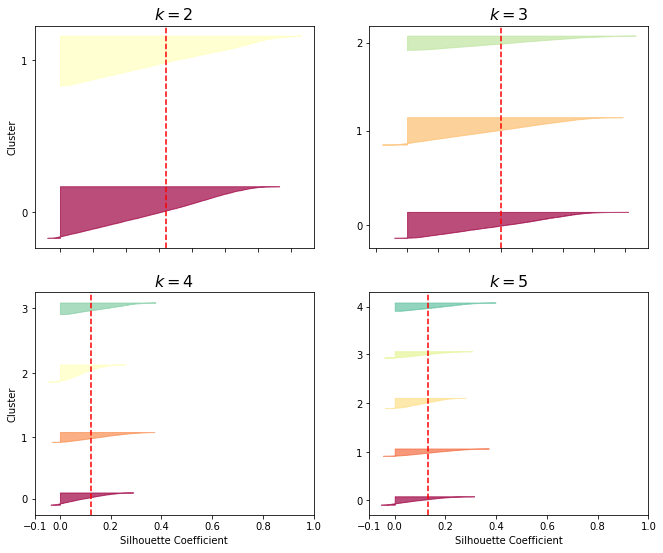

In [86]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from matplotlib.cm import Spectral
plt.figure(figsize=(11, 9))


# lets plot the silhoutte diagraham for every instance in every cluster, for sizes 2, 3, 4, and 5

# this would show use the silhoutte coeffiencents for every instance 
# in the clusters for our peak performing sizes, our lowest performing size, and a size up from lowest performing 
for k in (2, 3, 4, 5):

    #2 rows, 2 chart per row
    plt.subplot(2, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(processedX, y_pred)

    padding = len(processedX) 
    pos = padding
    ticks = []
    # plot coefficents 
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    # add y labels to the left side of left most plots
    if k in (2, 4):
        plt.ylabel("Cluster")
    # add x labels to the bottom bottom most plots
    if k in (4, 5):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

These plots confirm that cluster sizes 2 and 3 have higher silhoutte coefficients across all instances, and that cluster sizes of 4 and 5 have low silhoutte coeffiecents.

The tapered shape of the clusters across all diagrams suggests that the "confidence" for each cluster is low. Only a few instances in each cluster have very high (or in the case of k=4 and k=5, relatively high) silhoutte coefficients. This suggests that only these few instances are "well inside" their cluster and are likely to be accurately classified. 

This "boundary fuzziness" makes sense, as most letters are relatively distinct shapes. It may be hard to condense 26 letters into 2-3 clusters based on shape alone. For example, 'u', 'v', 'o', 'w' might cluster fairly well into a "short letter" category, where 'f', 't', 'l' and 'k' might cluster well into a "tall letter category." It's less clear how 'j' or 'y' or 'p' might fit into these clusters. Therefore, an instance 'o' might have a silhoutte coefficent approaching 1 for cluster 0 ("short letter"). Another cluster 0 ("short letter") instance 'p' might have a fuzzier boundary with cluster 1 ("tall letter"), and therefore would have a silhoutte coefficent closer to 0. 

It appears that all but one cluster in each model misclassfies instances. Misclassification is represented by the tails on the left side of each cluster (instance coefficients below 0 are considered misclassifications). 

The 3-cluster model seems to be slightly more precise than 2-cluster model. In the 3-cluster model, all clusters are skinnier, which suggests fewer instances have higher coefficients overall (e.g., coefficents >=0.5). But the 3-cluster model has longer clusters than the 2-cluster model. This length suggests that the few instances that do have higher coefficients have coffiecients that approach perfect (~1). This suggests a greater 'confidence' in the "correctly" clustered instances. 

Overall, models of cluster size 2 and 3 perform well. 



# **Summary**

**Dataset**

The dataset consisted of 20,000 instances and 26 target classes (1 per letter). There were no missing data, and all data (execept the target class) was numeric, so very little processing was needed. 

All target classes were very well represented in the dataset. If the dataset had a discrete uniform distribution of target classes, there would be 769 instances per target class. The actual average frequency of a single target class within the data set was exactly 769. 

**Classifiers**

I trained several SVC and tree based classifiers on this dataset. Additionally, I trained a SGD classifier (with logistic regression as the loss function).

The highest peforming classifier was the extra trees classifier with an accuracy of ~96.8%. The next highest performing classifier was random forest, which had an accuracy of ~95.9%. The highest performing SVC classifier used a polynomial kernel, and had an accuracy of 94.2%. 

Forest-based classifiers (extra trees, random forest) had the highest accuracy rates (~96-97%). In general, SVC models were the next best perfomers, with an average accuracy rate of 90%. The linear kernel SVC was the outlier of this group - at 85%, it had a lower accuracy rate than the lowest decision tree based model (which had average accuracy of ~87%). The lowest performing classifier was the SGD, which had an accuracy of only ~55%. 

In general, tree, forest, and SVC classifiers all performed very well on this dataset. 

**Voting Classifier**

I trained a hard voting classifier using an ensemble of all previously mentioned classifiers. 

The voting classifier outperformed all but the forest-based classifiers with an accuracy of ~95.7%. It's score was within 0.2% of the accuracy rate of the random forest classifier, and within 1.1% of the extra trees classifier. It's likely that the random forest and extra tree classifiers work very well for this dataset. Combining them with lower-performing classifiers doesn't provide benefits and thus, the voting classifier's accuracy was slightly lower than the accuracy of either of the forest-based classifiers.

**Feature importances**

All tree-based models agree that x-ege and y-ege are the two most significant features, and that x-box, y-box, width and high are less significant features. This means when a tree-based classifier is chosing a target class for an image, the horizontal and vertical edges of that image, and the the mean squared vertical and horizontal position of the "on" pixels in that image are the most significant distinguishing features between target classes. (They contribute the most as to whether a 't' is classified as a 't' or an 'o' for example.)

The tree-based models have slight disagreements over the importance for each features. These disagreements make sense, as feature rank depends on a number of factors, like the impurity criterion (Gini/Entropy) used and the individual members of the dataset the tree is being constructed from.

In general, single tree decision tree models had a few very important features, and many low importance features. Forest models like random forest and extra trees assigned more importance to all features. The least important features in the extra trees model, for example, had higher importances than the least important features in the decision tree models. 

**K-Means**

I trained K-Means on the dataset, with an initial k value of 26 (for 26 letters). 

The elbow (point after the sharpest decline in inertia) occurs at a cluster size of 2, though the curve of the elbow graph is soft. 

Cluster sizes of 2 and 3 have the highest (best) silhoutte scores. When cluster size is increased to 4, the silhoutte score drops to it's lowest value. The silhoutte score increases to a (lesser) second peak at a cluster size of 10. Additional clusters might reduce intracluster variation and improve the performance of the model (up to a point, of course).

The silhoutte diagrams confirm that cluster sizes 2 and 3 have higher silhoutte coefficients across all instances, and that cluster sizes of 4 and 5 have low silhoutte coeffiecents.

The tapered shape of the clusters across all diagrams suggests that the "confidence" for each cluster is low. Only a few instances in each cluster have very high (or in the case of k=4 and k=5, relatively high) silhoutte coefficients. This suggests that only these few instances are "well inside" their cluster and are likely to be accurately classified.

This "boundary fuzziness" makes sense, as most letters are relatively distinct shapes. It may be hard to condense 26 letters into 2-3 clusters based on shape alone. For example, 'u', 'v', 'o', 'w' might cluster fairly well into a "short letter" category, where 'f', 't', 'l' and 'k' might cluster well into a "tall letter category." It's less clear how 'j' or 'y' or 'p' might fit into these clusters. Therefore, an instance 'o' might have a silhoutte coefficent approaching 1 for cluster 0 ("short letter"). Another cluster 0 ("short letter") instance 'p' might have a fuzzier boundary with cluster 1 ("tall letter"), and therefore would have a silhoutte coefficent closer to 0.

Overall, models of cluster size 2 and 3 perform well.